In [15]:
#https://www.tensorflow.org/probability/examples/Probabilistic_Layers_VAE#dependencies_prerequisites
import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow import keras
#import tensorflow_addons as tfa

input_shape = (50, 50, 3)
num_features = 7500#50*50*3
latent_dim = 32

In [16]:
def encoder_CNN(input_shape = (50, 50, 3), latent_dim = 2):

    inputs = layers.Input(shape=input_shape, name='Input')

    # layer 1
    x = layers.Conv2D(filters=6, kernel_size=5, strides=1,padding='valid',name='C1')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
   # x = layers.MaxPool2D(pool_size=2, strides=2,name='S2')(x)

    # layer 2
    x = layers.Conv2D(filters=16, kernel_size=5,strides=1,padding='valid',name='C3')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
   # x = layers.MaxPool2D(pool_size=2, strides=2,name='S4')(x)

    # layer 3
    x = layers.Conv2D(filters=120, kernel_size=5,strides=1,padding='valid',name='C5')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Flatten()(x)

    y = layers.Dense(84, activation ='relu',name='F6')(x)
    outputs = layers.Dense(latent_dim, activation='relu', name='outputs')(y)
    model = keras.Model(inputs, outputs, name='encoder')
    
    return model

In [17]:
def encoder_CNN(input_shape = (50, 50, 3), latent_dim = 2):

    inputs = layers.Input(shape=input_shape, name='Input')

    # layer 1
    x = layers.Conv2D(filters=64, kernel_size=2, strides=1,padding='valid',name='C1')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
   # x = layers.MaxPool2D(pool_size=2, strides=2,name='S2')(x)

    # layer 2
    x = layers.Conv2D(filters=64, kernel_size=2,strides=1,padding='valid',name='C3')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
   # x = layers.MaxPool2D(pool_size=2, strides=2,name='S4')(x)

    # layer 3
    x = layers.Conv2D(filters=64, kernel_size=3,strides=1,padding='valid',name='C5')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)


    x = layers.Flatten()(x)

    y = layers.Dense(256, activation ='relu',name='F6')(x)
    
    outputs = layers.Dense(latent_dim, activation='relu', name='outputs')(y)
    model = keras.Model(inputs, outputs, name='encoder')
    
    return model

In [18]:
base_model = keras.applications.VGG19(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(50, 50, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

base_model.trainable = False


In [19]:
def encoder_CNN(input_shape = (50, 50, 3), latent_dim = 2): 
    inputs = layers.Input(shape=input_shape,name='Input')

    x = base_model.get_layer('block1_conv1')(inputs)
    x.trainable=False

    x = base_model.get_layer('block1_conv2')(x)
    x.trainable=False


    x = layers.Conv2D(filters=6, kernel_size=5, strides=1,padding='valid',name='conv1')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPool2D(pool_size=2, strides=2,name='S2')(x)
    

# layer 2
    x = layers.Conv2D(filters=16, kernel_size=5,strides=1,padding='valid',name='conv2')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPool2D(pool_size=2, strides=2,name='S4')(x)
    

# layer 3
    x = layers.Conv2D(filters=120, kernel_size=5,strides=1,padding='valid',name='conv3')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Flatten()(x)

    x = layers.Dropout(0.1)(x)
    x = layers.Dense(84, activation='relu',name='F6')(x)
    
    outputs = layers.Dense(latent_dim, activation='relu',name='Output')(x)
    
    model = keras.Model(inputs, outputs, name='encoder')
    return model

In [20]:
encoder = encoder_CNN(latent_dim = latent_dim)
encoder.summary()


Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 50, 50, 64)        36928     
                                                                 
 conv1 (Conv2D)              (None, 46, 46, 6)         9606      
                                                                 
 batch_normalization_24 (Bat  (None, 46, 46, 6)        24        
 chNormalization)                                                
                                                                 
 re_lu_24 (ReLU)             (None, 46, 46, 6)         0         
                                                           

In [21]:
def decoder_CNN(input_shape = (50, 50, 3), latent_dim = 2):
    latent_inputs = layers.Input(shape=(latent_dim,))

    #layer 1
    x = layers.Dense(256, activation ='tanh',name='F6l')(latent_inputs)

    #layer 2
    x = layers.Dense(25*25*64, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Reshape((25, 25, 64))(x)

    #x = layers.Reshape(target_shape=(5, 5, 120))(x) #(5, 5, 120)
    # layer 3
    x = layers.Conv2DTranspose(filters=64, kernel_size=3,strides=1,padding='valid',name='D5l')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    
    # layer 4
    x = layers.Conv2DTranspose(filters=64, kernel_size=3, strides=2,padding='valid',name='D1l')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)


    outputs = layers.Conv2D(filters=3, kernel_size=6, strides=1,activation='sigmoid',padding='valid')(x)

    model = keras.Model(latent_inputs, outputs, name='decoder')
    return model


In [22]:
def decoder_CNN(input_shape = (50, 50, 3), latent_dim = 2):
    latent_inputs = layers.Input(shape=(latent_dim,))

    #layer 1
    x = layers.Dense(256, activation ='tanh',name='F6l')(latent_inputs)

    #layer 2
    x = layers.Dense(5*5*120, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Reshape((5, 5, 120))(x)

    #x = layers.Reshape(target_shape=(5, 5, 120))(x) #(5, 5, 120)
    # layer 3
    x = layers.Conv2DTranspose(filters=120, kernel_size=5,strides=1,padding='valid',name='Dconv3')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.UpSampling2D()(x)


    # layer 2
    x = layers.Conv2DTranspose(filters=16, kernel_size=5,strides=1,padding='valid',name='Dconv2')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.UpSampling2D()(x)

    x = layers.Conv2DTranspose(filters=6, kernel_size=5, strides=1,padding='valid',name='Dconv1')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
#
    x = layers.Conv2DTranspose(filters=64, kernel_size=3, strides=1,padding='valid',name='vgg_conv1')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    
    x = layers.Conv2DTranspose(filters=64, kernel_size=3,strides=1,padding='valid',name='vgg_conv2')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    outputs = layers.Conv2D(filters=3, kernel_size=3, strides=1,activation='sigmoid',padding='valid')(x)

    model = keras.Model(latent_inputs, outputs, name='decoder')
    return model


In [23]:
decoder = decoder_CNN(latent_dim = latent_dim)
decoder.summary()


Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32)]              0         
                                                                 
 F6l (Dense)                 (None, 256)               8448      
                                                                 
 dense_3 (Dense)             (None, 3000)              771000    
                                                                 
 dropout_7 (Dropout)         (None, 3000)              0         
                                                                 
 reshape_3 (Reshape)         (None, 5, 5, 120)         0         
                                                                 
 Dconv3 (Conv2DTranspose)    (None, 9, 9, 120)         360120    
                                                                 
 batch_normalization_27 (Bat  (None, 9, 9, 120)        480 

In [24]:
def AE(input_shape, latent_dim, encoder, decoder):
    vae_input = layers.Input(shape = input_shape, name="AE_input")
    encoder_output = encoder(vae_input)
    decoder_output = decoder(encoder_output)
    model = keras.Model(vae_input, decoder_output, name='AE')
    return model

In [25]:
def AE(input_shape, latent_dim, encoder, decoder):
    vae_input = layers.Input(shape = input_shape, name="AE_input")

    encoder = encoder_CNN(latent_dim = latent_dim)
 

    decoder = decoder_CNN(latent_dim = latent_dim)
   

    ae = keras.Model(encoder.input, decoder(encoder.output), name='AE')
    return ae, encoder, decoder

Model: "AE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 50, 50, 64)        36928     
                                                                 
 conv1 (Conv2D)              (None, 46, 46, 6)         9606      
                                                                 
 batch_normalization_32 (Bat  (None, 46, 46, 6)        24        
 chNormalization)                                                
                                                                 
 re_lu_32 (ReLU)             (None, 46, 46, 6)         0         
                                                                

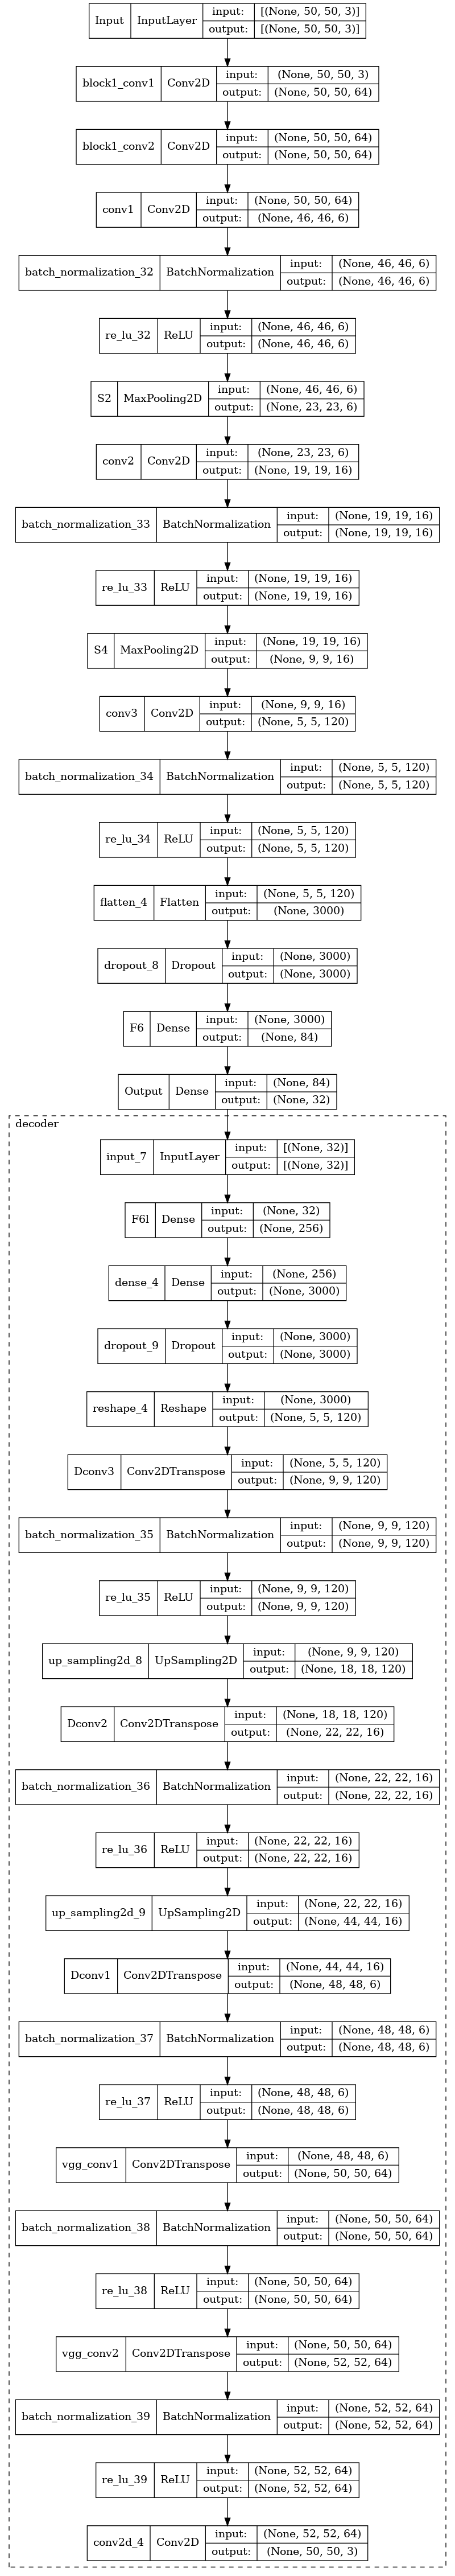

In [26]:
ae, _, _ = AE(input_shape, latent_dim, encoder, decoder)
ae.summary()
plot_model(ae,show_shapes=True, show_layer_names=True,expand_nested=True)

In [27]:
def ae_loss(y_true, y_predict):
    reconstruction_loss_factor = 1
    reconstruction_loss = K.mean(K.square(y_true - y_predict), axis=[1, 2, 3])
    return reconstruction_loss_factor * reconstruction_loss

In [28]:
#Information needed to compute the loss function
ae_input = ae.input
ae_output = ae.output

#ae.add_loss(ae_loss( ae_input, ae_output))
#ae.add_metric('mse')
ae.compile(loss='mse', optimizer='adam')

In [31]:

ae.save('models/ae.h5')  
encoder.save('models/ae_encoder.h5')
decoder.save('models/ae_decoder.h5')    